# MScFE 610 Econometrics (C22-S1) - Groupwork Assignment Submission 2 M5

### Impoting required libraries

In [9]:
!pip install matplotlib

In [22]:
import warnings
from IPython.display import Image
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from matplotlib import rcParams
import statsmodels.api as sm
import datetime as dt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from arch import arch_model

In [23]:
warnings.filterwarnings('ignore')
%matplotlib inline
rcParams['figure.figsize'] = 20,10

### Step 0: Selecting a data set

For gold ETF, we choose SPDR Gold Trust (GLD) and for non-US equity ETF, we choose: iShares MSCI Emerging Markets ETF (EEM). We also pull data for Grayscale Bitcoin Trust (GBTC).

### Step 1: Data Importing

We consider three time points for splitting the pulled data:

In [24]:
Jan20 = dt.datetime(2020,1,1)
Apr20 = dt.datetime(2020,4,1)
Jul20 = dt.datetime(2020,7,1)
Oct20 = dt.datetime(2020,10,1)
Jan21 = dt.datetime(2021,1,1)

#### Gold ETF (GLD):

In [25]:
GLD = yf.download('GLD',start = Jan20, end = Jan21,  progress = False)
GLD[Apr20:Jan21].head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-04-01,148.199997,150.080002,147.850006,149.449997,149.449997,11827400
2020-04-02,151.199997,152.500000,150.699997,151.899994,151.899994,9188300
2020-04-03,152.229996,153.089996,151.660004,152.649994,152.649994,8469100
2020-04-06,154.160004,157.220001,153.960007,156.880005,156.880005,14739300
2020-04-07,155.330002,156.139999,154.380005,156.039993,156.039993,9195400


In [26]:
GLD = GLD['Adj Close']

#### Emerging Markets ETF (EEM):

In [27]:
EEM = yf.download('EEM', start = Jan20, end = Jan21, progress = False)
EEM[Apr20:Jan21].head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-04-01,33.099998,33.330002,32.619999,32.669998,31.540222,65580600
2020-04-02,33.290001,33.939999,33.200001,33.770000,32.602184,55784000
2020-04-03,33.689999,33.860001,32.950001,33.130001,31.984318,68672500
2020-04-06,34.439999,34.950001,34.299999,34.939999,33.731720,82394800
2020-04-07,36.090000,36.119999,35.049999,35.119999,33.905502,74322600


In [28]:
EEM = EEM['Adj Close']

#### Bitcoin (BTC):

In [29]:
GBTC = yf.download('GBTC', start = Jan20, end = Jan21, progress = False)
GBTC[Apr20:Jan21].head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-04-01,6.800,6.90,6.41,6.495,6.495,4274800
2020-04-02,7.000,7.87,6.98,7.720,7.720,7980600
2020-04-03,7.940,7.94,7.25,7.480,7.480,3059800
2020-04-06,7.824,8.06,7.71,7.950,7.950,4910400
2020-04-07,8.070,8.15,7.61,7.660,7.660,3469900


In [30]:
GBTC = GBTC['Adj Close']

#### Integrating the data

In [31]:
data = pd.DataFrame({'EEM':EEM, 'GLD':GLD, 'GBTC':GBTC})
data[Apr20:Jan21].head()

,EEM,GLD,GBTC
Date,,,
2020-04-01,31.540222,149.449997,6.495
2020-04-02,32.602184,151.899994,7.720
2020-04-03,31.984318,152.649994,7.480
2020-04-06,33.731720,156.880005,7.950
2020-04-07,33.905502,156.039993,7.660


In [32]:
data.isnull().any()

EEM     False
GLD     False
GBTC    False
dtype: bool

In [33]:
data_Q2 = data[Apr20:Jul20]
data_Q3 = data[Jul20:Oct20]
data_Q4 = data[Oct20:Jan21]

### Step 2: Data Processing

Compute the daily returns of your gold ETF, your Equity ETF, and bitcoin of April 2020 through Dec 2020

In [34]:
data['GLD_lr'] = np.log(data['GLD']).diff()
data['EEM_lr'] = np.log(data['EEM']).diff()
data['GBTC_lr'] = np.log(data['GBTC']).diff()
data[Apr20:Jan21].head()

,EEM,GLD,GBTC,GLD_lr,EEM_lr,GBTC_lr
Date,,,,,,
2020-04-01,31.540222,149.449997,6.495,0.009412,-0.043720,-0.091875
2020-04-02,32.602184,151.899994,7.720,0.016261,0.033116,0.172782
2020-04-03,31.984318,152.649994,7.480,0.004925,-0.019134,-0.031582
2020-04-06,33.731720,156.880005,7.950,0.027334,0.053193,0.060939
2020-04-07,33.905502,156.039993,7.660,-0.005369,0.005139,-0.037160


### Step 3: Data Summaries

In [35]:
data['EEM_MA20'] = data['EEM'].rolling(window=20).mean()
data['GLD_MA20'] = data['GLD'].rolling(window=20).mean()
data['GBTC_MA20'] = data['GBTC'].rolling(window=20).mean()
data = data[Apr20:Jan21]
data.head()

,EEM,GLD,GBTC,GLD_lr,EEM_lr,GBTC_lr,EEM_MA20,GLD_MA20,GBTC_MA20
Date,,,,,,,,,
2020-04-01,31.540222,149.449997,6.495,0.009412,-0.043720,-0.091875,33.350867,149.164499,7.5127
2020-04-02,32.602184,151.899994,7.720,0.016261,0.033116,0.172782,33.003316,148.884998,7.3522
2020-04-03,31.984318,152.649994,7.480,0.004925,-0.019134,-0.031582,32.665420,148.639998,7.1972
2020-04-06,33.731720,156.880005,7.950,0.027334,0.053193,0.060939,32.547156,148.593498,7.1512
2020-04-07,33.905502,156.039993,7.660,-0.005369,0.005139,-0.037160,32.345866,148.671498,7.0712


### Step 4: Graphing

In this section, we graph both prices and moving averages of the financial products and provide some simple technical discussion

Text(0,0.5,'Price (USD)')

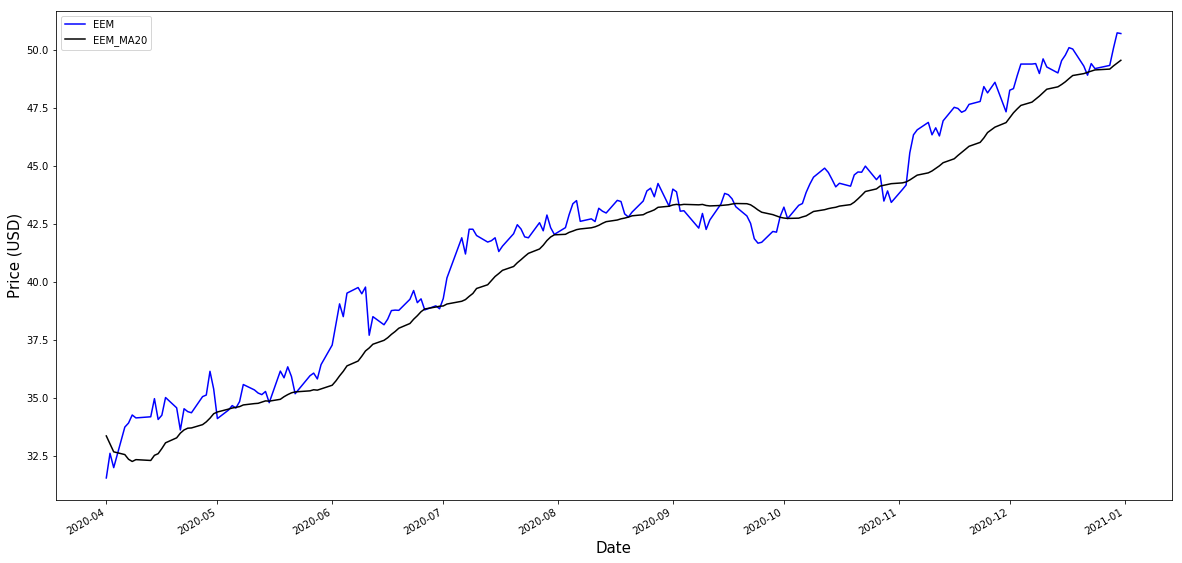

In [36]:
ax1 = data[['EEM','EEM_MA20']].plot(color = ['blue','black'])
ax1.set_xlabel('Date', size=15)
ax1.set_ylabel('Price (USD)', size=15)

For EEM, the moving average has basically acted as up-trend support and we have only short-duration of crossing of the price and moving average.

Text(0,0.5,'Price (USD)')

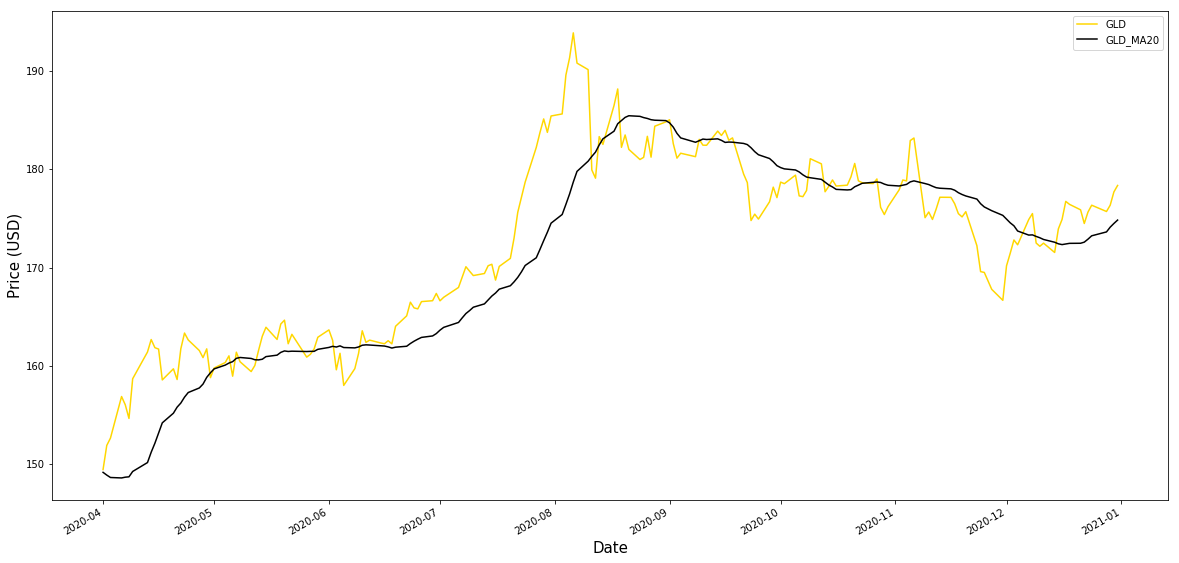

In [37]:
ax2 = data[['GLD','GLD_MA20']].plot(color = ['gold','black'])
ax2.set_xlabel('Date', size=15)
ax2.set_ylabel('Price (USD)', size=15)

For GLD, the moving average has acted as up-trend support till mid-Aug and we have then a major crossing of the price and moving average which has lead to a sideways/down-trend price action.

Text(0,0.5,'Price (USD)')

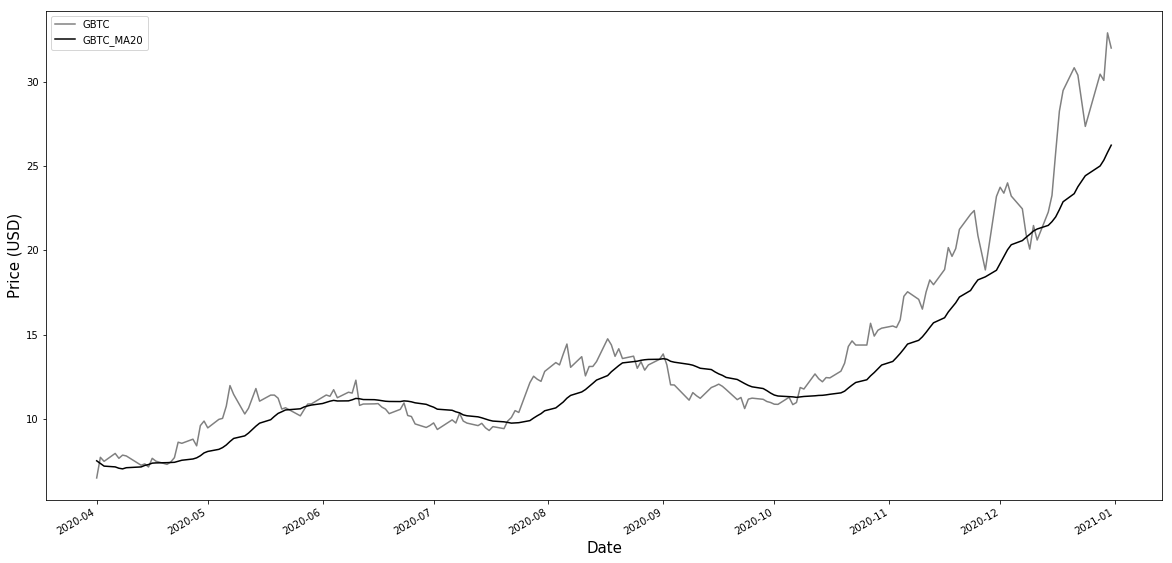

In [38]:
ax3 = data[['GBTC','GBTC_MA20']].plot(color = ['gray','black'])
ax3.set_xlabel('Date', size=15)
ax3.set_ylabel('Price (USD)', size=15)

For GBTC, we have alternate crossing of the moving average and price till Oct which describes a sideways price action by then. However, after Oct, we have a major uptrend and no significant crossing in the continuation.

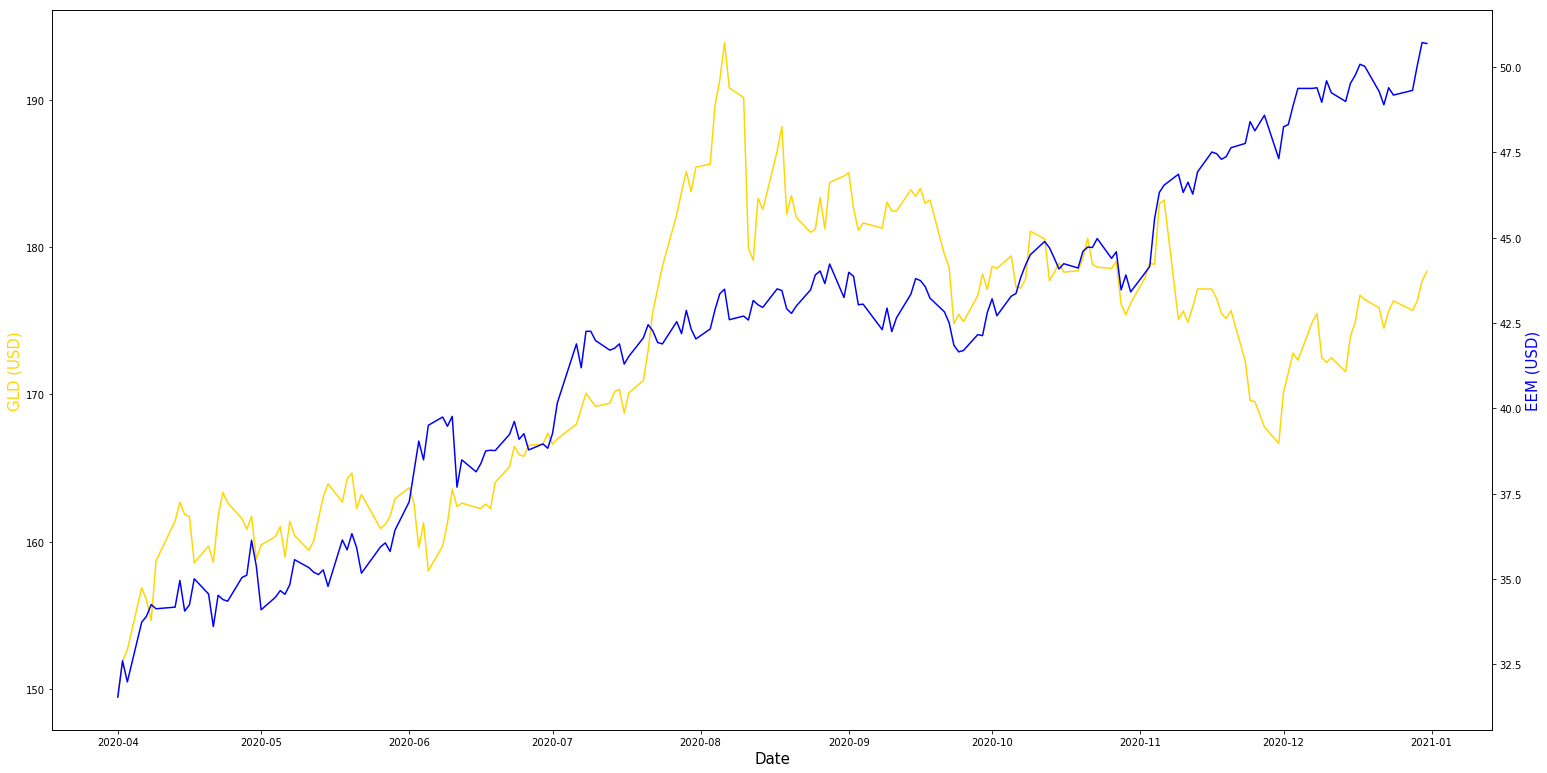

In [39]:
fig1 = plt.figure()
ax4 = fig1.add_axes([.1,.1,1,1])
ax4.plot(data.index, data.GLD,  color='gold')
ax4.set_xlabel('Date', size = 15)
ax4.set_ylabel('GLD (USD)', size=15, color='gold')
ax4_2 = ax4.twinx()
ax4_2.plot(data.index, data.EEM, color='blue')
ax4_2.set_ylabel('EEM (USD)', size=15, color='blue')
plt.show()

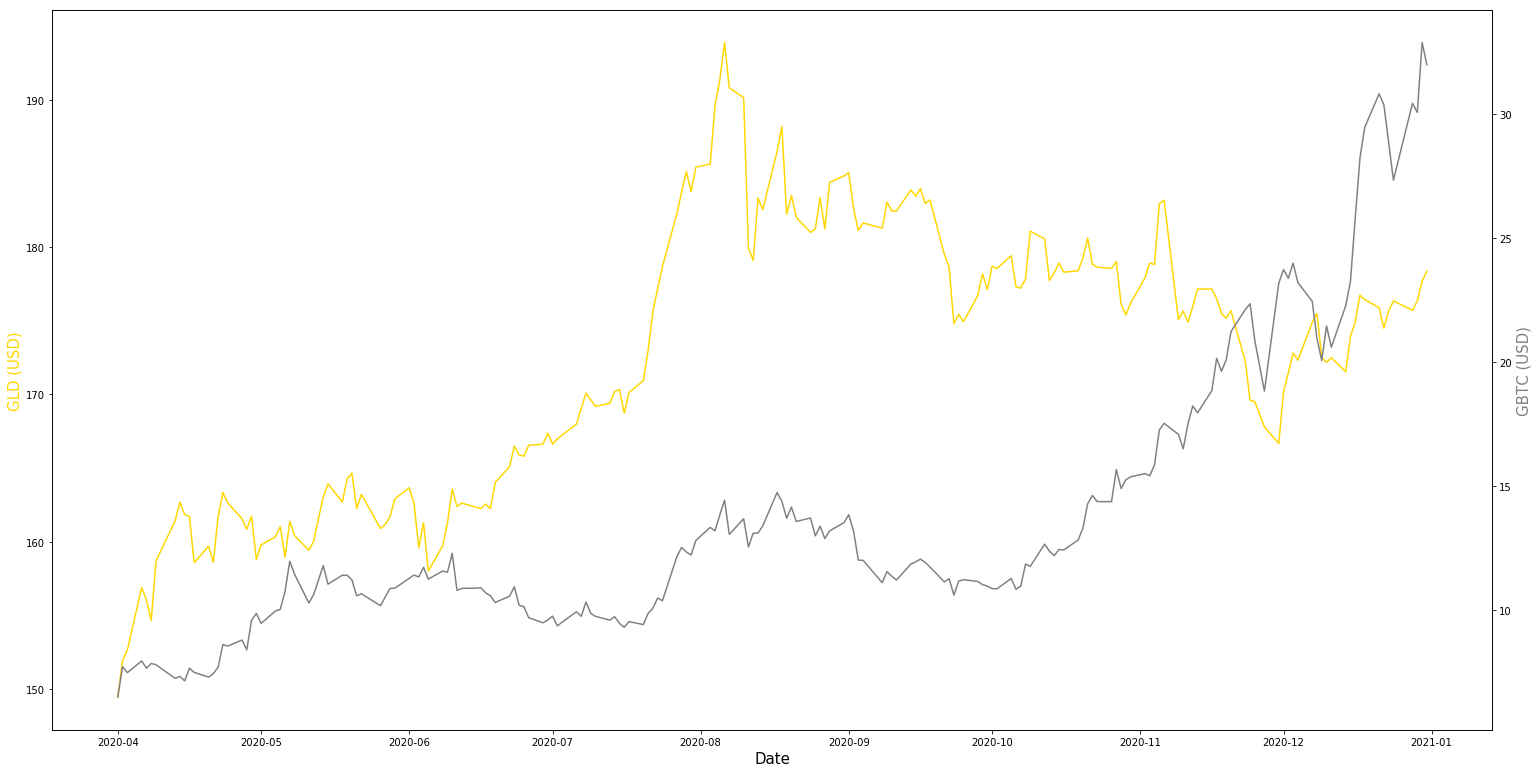

In [40]:
fig2 = plt.figure()
ax5 = fig2.add_axes([.1,.1,1,1])
ax5.plot(data.index, data.GLD,  color='gold')
ax5.set_xlabel('Date', size = 15)
ax5.set_ylabel('GLD (USD)', size=15, color='gold')
ax5_2 = ax5.twinx()
ax5_2.plot(data.index, data.GBTC, color='gray')
ax5_2.set_ylabel('GBTC (USD)', size=15, color='gray')
plt.show()

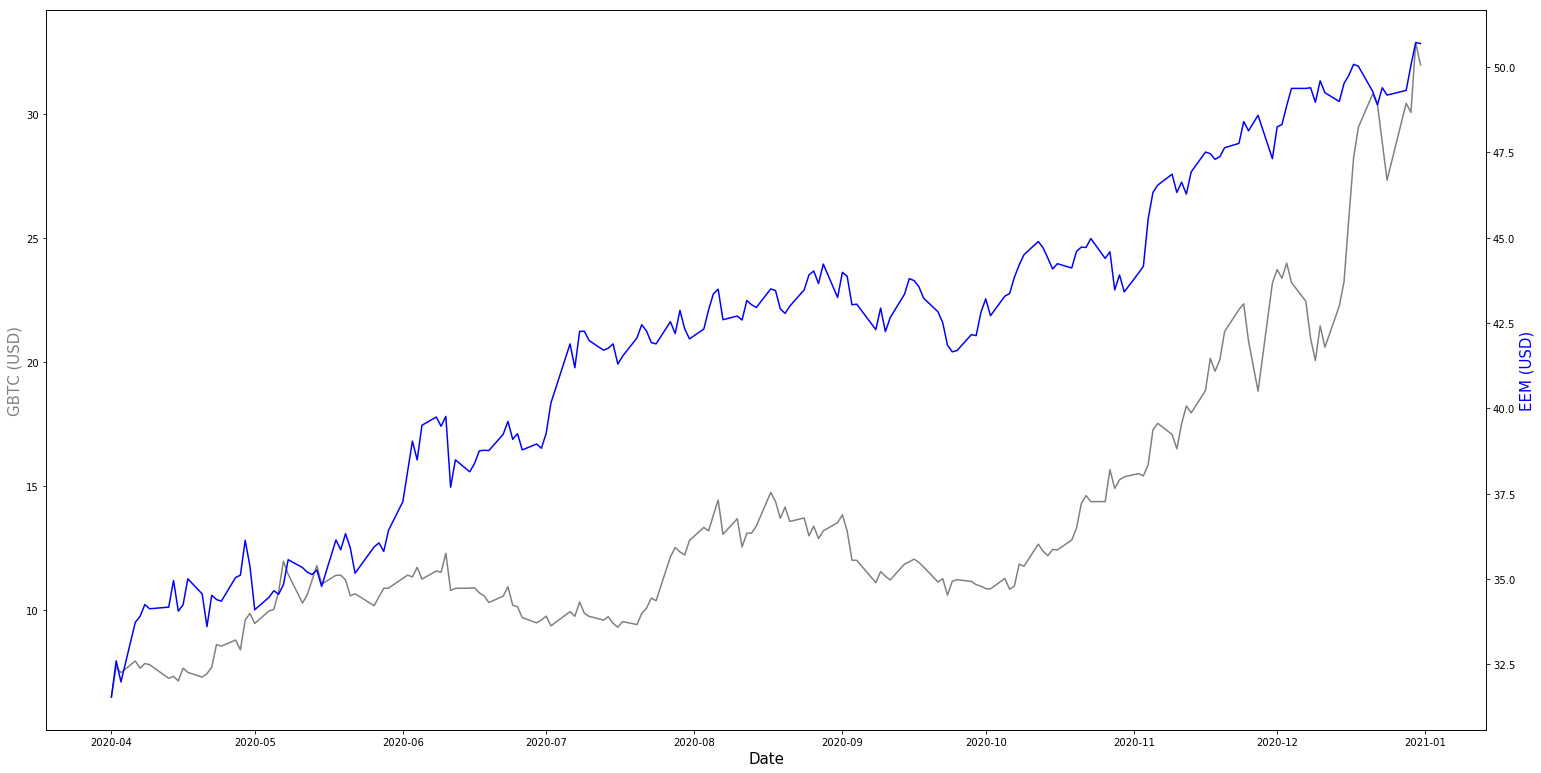

In [41]:
fig3 = plt.figure()
ax6 = fig3.add_axes([.1,.1,1,1])
ax6.plot(data.index, data.GBTC,  color='gray')
ax6.set_xlabel('Date', size = 15)
ax6.set_ylabel('GBTC (USD)', size=15, color='gray')
ax6_2 = ax6.twinx()
ax6_2.plot(data.index, data.EEM, color='blue')
ax6_2.set_ylabel('EEM (USD)', size=15, color='blue')
plt.show()

### Step 5: Fitting a GARCH Model

We consider the time-series returns to fit the GARCH model. In step 6, it is shown that the time-series returns are stationay. A more complete approach would be to first fit an ARIMA model, find residual and fit the GARCH model to the residual. However, since the problem asks to fit the GARCH model directly, we will do accordingly. In this case we assume that the time-series return consists of a mean and a residual term. To find the residual terms, we substract the mean value from the return series. 

We choose to model the gold (GLD) volatility using GARCH models. First, we try estimating the model orders using ACF/PACF:

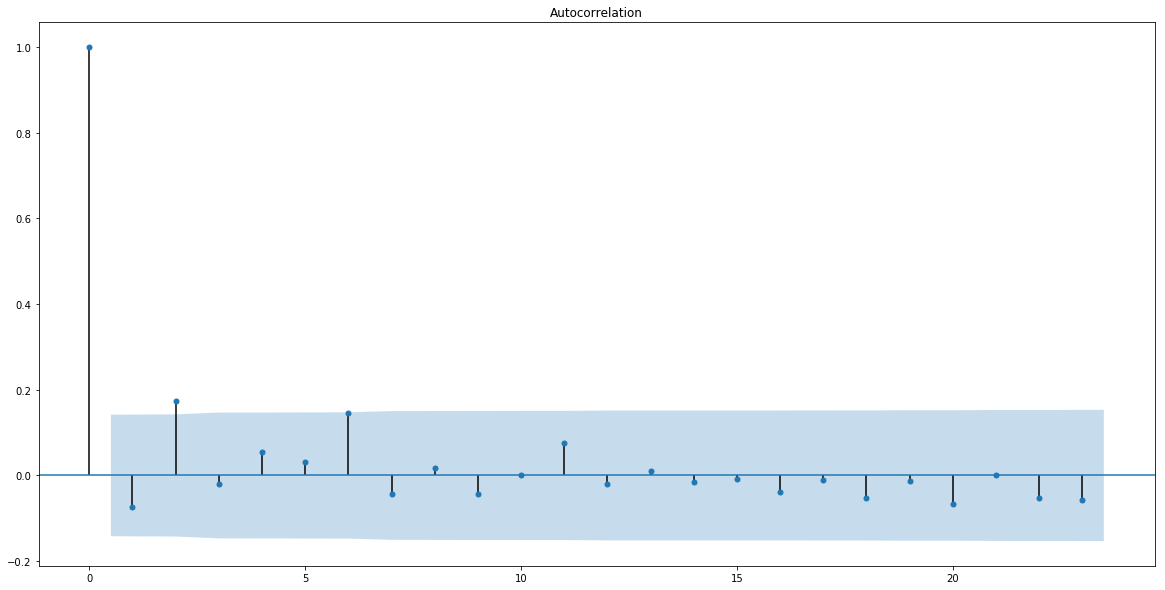

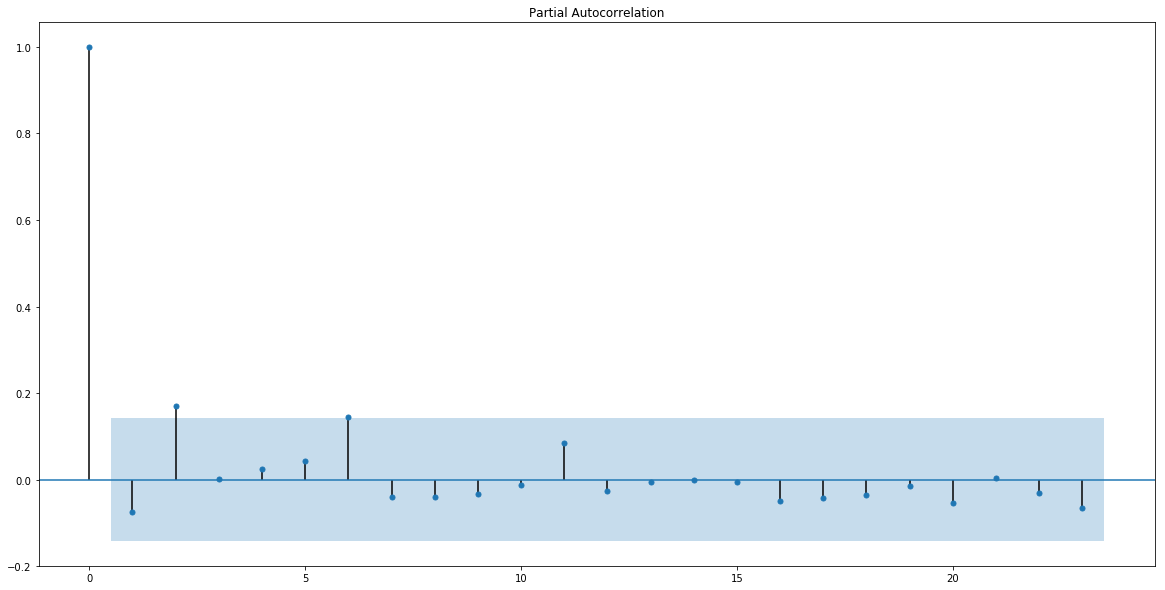

In [60]:
series = data['GLD_lr'] - data['GLD_lr'].mean()
plot_acf(series**2)
plt.show()
plot_pacf(series**2)
plt.show()

Based on the ACF/PACF plots, we see minimal lagged correlations. So, we choose GARCH(1,1) models.

#### Q2 modeling:

In [65]:
series_Q2 = data_Q2['GLD_lr']-data_Q2['GLD_lr'].mean()
model_Q2 = arch_model(series_Q2, p=1, q=1)
model_Q2.fit().summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 4.625074722029908e+16
Iteration:      2,   Func. Count:     17,   Neg. LLF: 171433213.5436107
Iteration:      3,   Func. Count:     29,   Neg. LLF: -204.03211774378994
Optimization terminated successfully    (Exit mode 0)
            Current function value: -204.03211831241742
            Iterations: 7
            Function evaluations: 29
            Gradient evaluations: 3


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                 GLD_lr   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                204.032
Distribution:                  Normal   AIC:                          -400.064
Method:            Maximum Likelihood   BIC:                          -391.429
                                        No. Observations:                   64
Date:                Wed, Apr 20 2022   Df Residuals:                       63
Time:                        19:50:32   Df Model:                            1
                                   Mean Model                                  
===============================================================================
                  coef    std err          t      P>|t|        95.0% Conf. Int.
-------------------------------------------------------------------------------
mu         -5.6452e-04  3.333e-06   -169.364      0.000 [-5.710e-04,-5.580e-04]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      2.0694e-06  2.138e-10   9678.871      0.000 [2.069e-06,2.070e-06]
alpha[1]       0.1000  8.662e-02      1.154      0.248  [-6.978e-02,  0.270]
beta[1]        0.8800  7.112e-02     12.374  3.623e-35     [  0.741,  1.019]
============================================================================

Covariance estimator: robust
"""

Based on the Q2 results:
$$\omega = 2.07(10^{-6}), \alpha = 0,  \beta = 0.88$$
So, the long-term variance (unconditional) being  $\frac{\omega}{1-\alpha-\beta}$ is equal to: $0.000017245$ 

#### Q3 modeling:

In [66]:
series_Q3 = data_Q3['GLD_lr']-data_Q3['GLD_lr'].mean()
model_Q3 = arch_model(series_Q3, p=1, q=1)
model_Q3.fit().summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 2142554736.4043696
Iteration:      2,   Func. Count:     17,   Neg. LLF: 89864.66070253304
Iteration:      3,   Func. Count:     28,   Neg. LLF: 469.2048515353849
Iteration:      4,   Func. Count:     36,   Neg. LLF: 191639.47884835137
Iteration:      5,   Func. Count:     46,   Neg. LLF: 8.392431802109256
Iteration:      6,   Func. Count:     54,   Neg. LLF: 520.5289553118413
Iteration:      7,   Func. Count:     63,   Neg. LLF: -135.93625047997713
Iteration:      8,   Func. Count:     70,   Neg. LLF: -191.07562629992003
Iteration:      9,   Func. Count:     76,   Neg. LLF: -195.1516442266448
Iteration:     10,   Func. Count:     82,   Neg. LLF: -179.7324586120272
Iteration:     11,   Func. Count:     88,   Neg. LLF: -195.26972321454053
Iteration:     12,   Func. Count:     93,   Neg. LLF: -195.2630287141574
Iteration:     13,   Func. Count:     99,   Neg. LLF: -195.2704228203858
Iteration:     14,   Func. Count:    103,   Neg. LLF

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                 GLD_lr   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                195.270
Distribution:                  Normal   AIC:                          -382.541
Method:            Maximum Likelihood   BIC:                          -373.843
                                        No. Observations:                   65
Date:                Wed, Apr 20 2022   Df Residuals:                       64
Time:                        19:50:53   Df Model:                            1
                                  Mean Model                                  
==============================================================================
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
mu         -1.3119e-04  1.468e-03 -8.939e-02      0.929 [-3.008e-03,2.745e-03]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      1.6598e-05  4.011e-11  4.138e+05      0.000 [1.660e-05,1.660e-05]
alpha[1]       0.2280      0.249      0.916      0.360     [ -0.260,  0.716]
beta[1]        0.7146      0.123      5.805  6.437e-09     [  0.473,  0.956]
============================================================================

Covariance estimator: robust
"""

Based on the Q3 results:
$$\omega = 1.66(10^{-5}), \alpha = 0,  \beta = 0.72$$
So, the long-term variance (unconditional) being  $\frac{\omega}{1-\alpha-\beta}$ is equal to: $0.00005203$

#### Q4 modeling:

In [67]:
series_Q4 = data_Q4['GLD_lr']-data_Q4['GLD_lr'].mean()
model_Q4 = arch_model(series_Q4, p=1, q=1)
model_Q4.fit().summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 5558931.014819954
Iteration:      2,   Func. Count:     17,   Neg. LLF: -57.4741738904573
Iteration:      3,   Func. Count:     25,   Neg. LLF: -13.14235989478264
Iteration:      4,   Func. Count:     33,   Neg. LLF: -202.43145463622955
Iteration:      5,   Func. Count:     38,   Neg. LLF: -202.42465867078596
Optimization terminated successfully    (Exit mode 0)
            Current function value: -202.4314566093114
            Iterations: 5
            Function evaluations: 40
            Gradient evaluations: 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                 GLD_lr   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                202.431
Distribution:                  Normal   AIC:                          -396.863
Method:            Maximum Likelihood   BIC:                          -388.227
                                        No. Observations:                   64
Date:                Wed, Apr 20 2022   Df Residuals:                       63
Time:                        19:52:15   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         8.8366e-05  1.268e-03  6.966e-02      0.944 [-2.398e-03,2.574e-03]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      1.0532e-04  4.149e-05      2.539  1.113e-02  [2.401e-05,1.866e-04]
alpha[1]   5.2748e-09  2.519e-02  2.094e-07      1.000 [-4.938e-02,4.938e-02]
beta[1]        0.0000      0.244      0.000      1.000      [ -0.478,  0.478]
=============================================================================

Covariance estimator: robust
"""

Based on the Q4 results:
$$\omega = 1.05(10^{-4}), \alpha = 0,  \beta = 0$$
So, the long-term variance (unconditional) being  $\frac{\omega}{1-\alpha-\beta}$ is equal to: $0.00010532$

### Step 6: Assessing Stationarity

For the three time_series during Q2, we use Augmented Dickey-Fuller (ADF) test to check the stationarity. ADF is in fact for testing the existance of the unit root that is the null hypothesis of the test. So, if we manage to reject the null hypothesis using ADF, we can then consider the alternative hypothesis which is stationarity of the time-series.

In the default implemetation of lag selection in ADF arch library, the number of lags is selected through sequential decreasing. Since our objective first is to identify whether an unit root exist, we initially conduct an ADF test with no trend component

#### GLD:

In [47]:
from arch.unitroot import ADF
ADF(data_Q2['GLD'], trend = "n")

Test Statistic,1.249
P-value,0.946
Lags,1


#### EEM:

In [48]:
ADF(data_Q2['EEM'], trend = "n")

Test Statistic,1.643
P-value,0.976
Lags,1


#### GBTC:

In [49]:
ADF(data_Q2['GBTC'], trend = "n")

Test Statistic,0.452
P-value,0.814
Lags,0


All data in Q2 of GLD, EEM, and GBTC suggest that the time series contains unit root. We use time series return to check if they are stationary:

In [50]:
series = data_Q2['GLD_lr']
p_value = adfuller(series)[1]
print(f'the ADF p_value for GLD in Q1 is: {p_value}')

the ADF p_value for GLD in Q1 is: 3.3707489802171355e-14


In [51]:
series = data_Q2['EEM_lr']
p_value = adfuller(series)[1]
print(f'the ADF p_value for GLD in Q1 is: {p_value}')

the ADF p_value for GLD in Q1 is: 5.918824210669841e-21


In [52]:
series = data_Q2['GBTC_lr']
p_value = adfuller(series)[1]
print(f'the ADF p_value for GLD in Q1 is: {p_value}')

the ADF p_value for GLD in Q1 is: 2.8592549901009657e-18


Based on the results above, all the three time-series returns are stationary during Q2 of 2020.

### Step 7: Modelling Cointegration

Using Q2 and Q3 data (April - Sept period), test all the 3 combinations of cointegration using Engle-Granger and Johansen test as following: (gold, equity), (equity, bitcoin) and (bitcoin, gold).

In [44]:
data_Q2

,EEM,GLD,GBTC,GLD_lr,EEM_lr,GBTC_lr,EEM_MA20,GLD_MA20,GBTC_MA20
Date,,,,,,,,,
2020-04-01,31.540220,149.449997,6.495,0.009412,-0.043720,-0.091875,33.350866,149.164499,7.5127
2020-04-02,32.602188,151.899994,7.720,0.016261,0.033116,0.172782,33.003316,148.884998,7.3522
2020-04-03,31.984314,152.649994,7.480,0.004925,-0.019134,-0.031582,32.665419,148.639998,7.1972
2020-04-06,33.731724,156.880005,7.950,0.027334,0.053193,0.060939,32.547155,148.593498,7.1512
2020-04-07,33.905499,156.039993,7.660,-0.005369,0.005138,-0.037160,32.345865,148.671498,7.0712
...,...,...,...,...,...,...,...,...,...
2020-06-25,39.258343,165.800003,10.140,-0.000603,0.004214,-0.005900,38.703703,162.715000,11.0115
2020-06-26,38.782543,166.539993,9.700,0.004453,-0.012194,-0.044362,38.821568,162.896500,10.9520
2020-06-29,38.957325,166.630005,9.490,0.000540,0.004497,-0.021887,38.906177,163.045000,10.8625


Engle-Granger test:

For co.int between gold and EEM

Since the ADF for all 3 time series suggest they are I(1), we now proceed to cointegration analysis 

In [74]:
from statsmodels.tsa.stattools import coint as ct
def eg_test(eq1, eq2):
    print(f'the t-statistic is: {ct(eq1, eq2)[0]}, the p-value is: {ct(eq1, eq2)[1]}, and the critical value at 5% test statistic is {ct(eq1, eq2)[2][1]}')
eg_test(data_Q2['GLD'],data_Q2['EEM'])

the t-statistic is: -3.6039069502783465, the p-value is: 0.024230190733755295, and the critical value at 5% test statistic is -3.434834787100025


Since the p value is small, we canreject the hypothesis that there is no cointegration relationship between the time series. This implies GLD can be a good predictor of EEM and vice versa

For co.int between bitcoin and EEM

In [76]:
eg_test(data_Q2['GBTC'],data_Q2['EEM'])

the t-statistic is: -1.5324571691210587, the p-value is: 0.7485368807443559, and the critical value at 5% test statistic is -3.434834787100025


Given the large p value, we fail to reject the hypothesis that there is no cointegration relationship between the time series. Thus we should not use GBTC as a predictor for EEM, and vice versa

In [80]:
eg_test(data_Q2['GBTC'],data_Q2['GLD'])

the t-statistic is: -1.3981691328459986, the p-value is: 0.7981401295281518, and the critical value at 5% test statistic is -3.434834787100025


Given the large p value, we fail to reject the hypothesis that there is no cointegration relationship between the time series. Thus we should not use GBTC as a predictor for GLD, and vice versa

In [88]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen as cj
def cj_test(eq1, eq2):
    np.vstack((data_Q2['GLD'],data_Q2['EEM'])).transpose().shape

(64, 2)

### Step 8: Correlation vs Cointegration

Correlation does not have a direction i.e.: $ corr(r_1,r_2) = corr(r_2,r_1) $. This is because to calculate coefficient, we normalize covarience the against the deviation standards of both $ r_1 $  and $ r_2 $.

Linear regression has direction i.e. the slope and intercept are different depending on the series we consider as the regressor variable. In this case, to calculate the slope, we normalize the covariance against the variance of the regressor and not noth of the variables.

Cointegration also has direction. This is because the coefficients that makes the linear combination of two variables that stationary cannot be interchanged to reach the same conclusion.